In [45]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

Question1:
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain

Number of multiplications required: (n)(k)(m);
Number of addition required: (n)(m)(k-1);

Question2:
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [46]:
n=int(input());
k=int(input());
m=int(input());

mat1=[];
mat2=[];
for i in range(0,n):
    dump=[];
    for i in range(0,k):
      d=np.random.randint(1,9);
      dump.append(d);
    mat1.append(dump);
for i in range(0,k):
  dump=[];
  for i in range(0,m):
    d=np.random.randint(1,9);
    dump.append(d);
  mat2.append(dump);

t1=time.time();
resmat=[[0]*m for i in range(n)];
for i in range(n):
  for j in range(k):
    for l in range(m):
      resmat[i][l]+=(mat1[i][j])*(mat2[j][l]);
t2=time.time();

dif1=t2-t1;

matarray1=np.array(mat1);
matarray2=np.array(mat2);

t1=time.time();
resmat=np.dot(matarray1,matarray2);
t2=time.time();

dif2=t2-t1;

if (float(dif1)>float(dif2)):
    print("Time complexity using numpy is less than lists of list.")
elif (float(dif2)>float(dif1)):
  print("Time complexity using lists of list is less than numpy.")

2
3
2
Time complexity using numpy is less than lists of list.


Question3:
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [47]:
def partition(l,start,end):
  pivot=l[start]
  i=start+1
  j=end
  while i<=j:
    while i<=end and l[i]<pivot:
      i=i+1
    while j>=start and l[j]>pivot:
      j=j-1
    if i<=j:
      l[i],l[j]=l[j],l[i]
      i=i+1
      j=j-1
  if i<=end:
    l[i-1],l[start]=l[start],l[i-1]
    return i-1
  else:
    l[end],l[start]=l[start],l[end]
    return end

def quicksort(l,start,end):
  if end<=start:
    return
  index=partition(l,start,end)
  quicksort(l,start,index-1)
  quicksort(l,index+1,end)

def median(l):
  if (len(l)%2!=0):
    return l[len(l)//2]
  else:
    return (l[len(l)//2]+l[(len(l)//2)-1])/2

l=[5,4,3,2,1]

t1=time.time()
quicksort(l,0,len(l)-1)
med=median(l)
t2=time.time()

dif1=t2-t1

l=np.array(l)

t1=time.time()
med=np.median(l)
t2=time.time()

dif2=t2-t1

print("Time complexity for finding median using sorting:",dif1)
print("Time complexity for finding median using numpy.median:",dif2)

Time complexity for finding median using sorting: 0.0002853870391845703
Time complexity for finding median using numpy.median: 0.006643056869506836


Question4:
What is the gradient of the following function with respect to x and y?
$$x^2*y+(y^3)*sin(x)$$

$$f(x,y)=(x^2)*y+(y^3)*sin(x)$$

Gradient of f(x,y) with respect to x

$$(d(f(x,y))/dx)=2*x*y+(y^3)*cos(x)$$

Gradient of f(x,y) with respect to y

$$(d(f(x,y))/dy)=(x^2)+3*(y^2)*sin(x)$$

Question5:
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [48]:
import jax
import jax.numpy as jnp

def f(x,y):
    return ((x**2)*y)+((y**3)*jnp.sin(x))

gradf=jax.grad(f,argnums=(0,1))

xval=float(input())
yval=float(input())

gradx,grady=gradf(xval,yval)

print("d(f(x,y))/d(x) for values x=",xval," y=",yval,":",gradx)
print("d(f(x,y))/d(y) for values x=",xval," y=",yval,":",grady)

2
3
d(f(x,y))/d(x) for values x= 2.0  y= 3.0 : 0.7640352
d(f(x,y))/d(y) for values x= 2.0  y= 3.0 : 28.55103


Question6:
Use sympy to confirm that you obtain the same gradient analytically.

In [49]:
import sympy as sp

x,y=sp.symbols('x y')
f=((x**2)*y)+((y**3)*sp.sin(x))

gradx=sp.diff(f,x)
grady=sp.diff(f,y)

gx=gradx.subs({x: xval, y: yval})
gy=grady.subs({x: xval, y: yval})

print("d(f(x,y))/d(x) for values x=",xval," y=",yval,":",gx)
print("d(f(x,y))/d(y) for values x=",xval," y=",yval,":",gy)

d(f(x,y))/d(x) for values x= 2.0  y= 3.0 : 0.764035413227155
d(f(x,y))/d(y) for values x= 2.0  y= 3.0 : 28.5510305242934


Question10:
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [50]:
year={
    2022:{
        "Branch1":{
            "Roll Number":1,
            "Name":'N',
            "Marks":{
                "Maths":100,
                "English":70
            }
        },
        "Branch2":{}
    },
    2023:{
        "Branch1":{},
        "Branch2":{}
    },
    2024:{
        "Branch1":{},
        "Branch2":{}
    },
    2025:{
        "Branch1":{},
        "Branch2":{}
    }
}

Question11:
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [51]:
class Marks:
    def __init__(self,maths,sci):
      self.maths=maths
      self.sci=sci

class Student:

  def __init__(self,name,rollno,maths,sci):
    self.name=name
    self.rollno=rollno
    self.marks=Marks(maths,sci)

class Branch:

  def __init__(self,branchname):
    self.branchname=branchname
    self.branchdetails={}

  def add_student(self,name,rollno,maths,sci):
    self.branchdetails[rollno]=Student(name,rollno,maths,sci)

class Year:
  def __init__(self,year):
    self.year=year
    self.yeardetails={}

  def add_branch(self,branchname,branch):
    self.yeardetails[branchname]=branch

class Database:
  def __init__(self):
    self.database={}

  def add_year(self,year,yeardetails):
    self.database[year]=yeardetails

database1=Database()

year2022=Year(2022)
branch1=Branch("branch1")
branch2=Branch("branch2")
branch1.add_student("N",1,100,70)
year2022.add_branch(branch1.branchname,branch1)
year2022.add_branch(branch2.branchname,branch2)
database1.add_year(year2022.year,year2022)

year2023=Year(2023)
branch1=Branch("branch1")
branch2=Branch("branch2")
year2023.add_branch(branch1.branchname,branch1)
year2023.add_branch(branch2.branchname,branch2)
database1.add_year(year2023.year,year2023)

year2024=Year(2024)
branch1=Branch("branch1")
branch2=Branch("branch2")
year2024.add_branch(branch1.branchname,branch1)
year2024.add_branch(branch2.branchname,branch2)
database1.add_year(year2024.year,year2024)

year2025=Year(2025)
branch1=Branch("branch1")
branch2=Branch("branch2")
year2025.add_branch(branch1.branchname,branch1)
year2025.add_branch(branch2.branchname,branch2)
database1.add_year(year2025.year,year2025)

Question9:Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [52]:
x=np.arange(0.5,100.5,0.5)

1)y=x

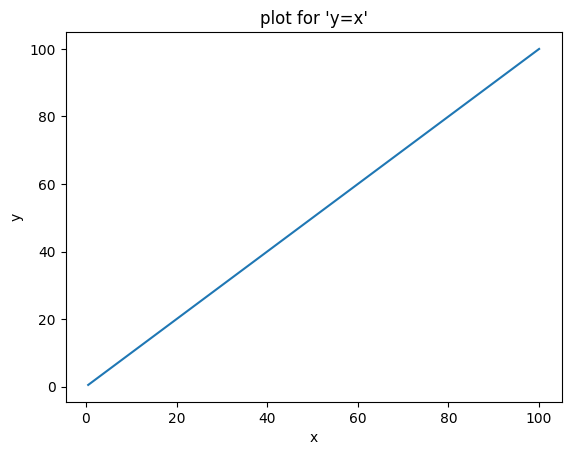

In [53]:
plt.plot(x,x)
plt.title("plot for 'y=x'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

2)y=x^2

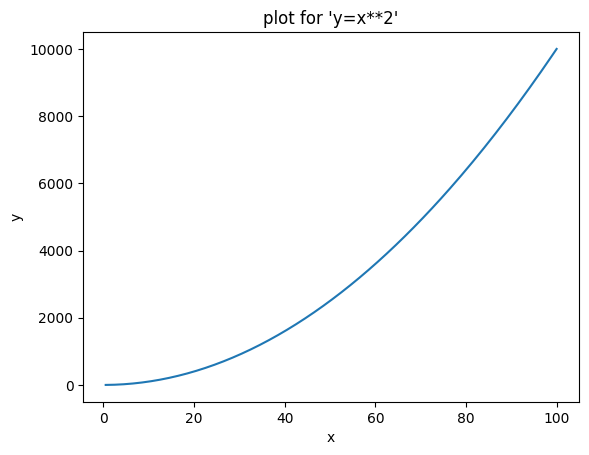

In [54]:
y=x**2
plt.plot(x,y)
plt.title("plot for 'y=x**2'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

3)y=(x^3)/100

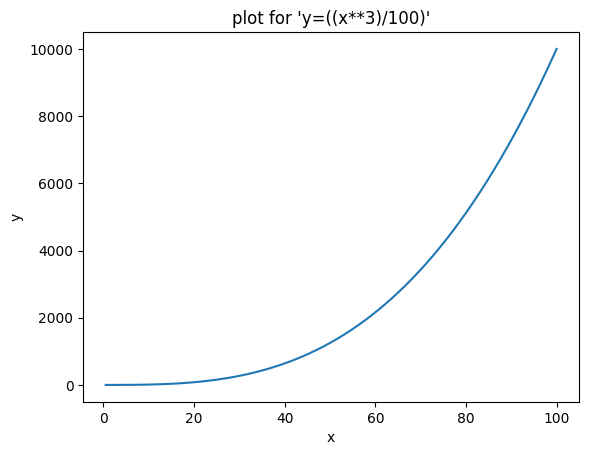

In [55]:
y=((x**3)/100)
plt.plot(x,y)
plt.title("plot for 'y=((x**3)/100)'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4)y=sin(x)

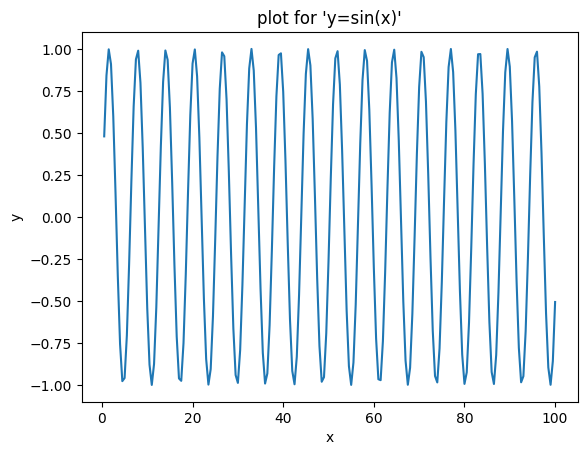

In [56]:
y=np.sin(x)
plt.plot(x,y)
plt.title("plot for 'y=sin(x)'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

5)y=(sin(x)/x)

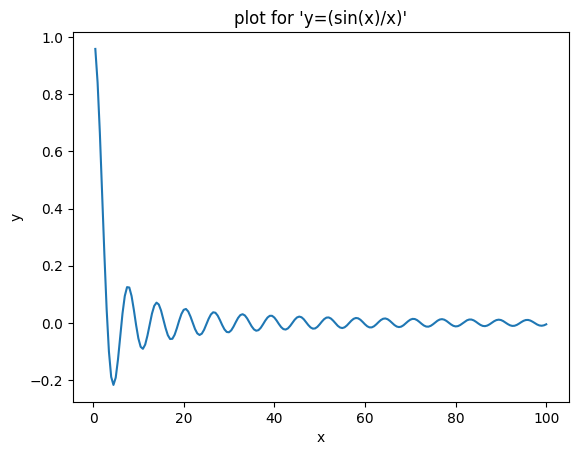

In [57]:
y=((np.sin(x))/x)
plt.plot(x,y)
plt.title("plot for 'y=(sin(x)/x)'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

6)y=log(x)

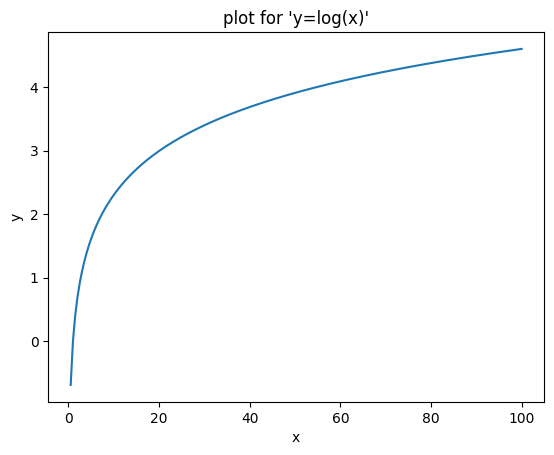

In [58]:
y=np.log(x)
plt.plot(x,y)
plt.title("plot for 'y=log(x)'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

7)y=e^x

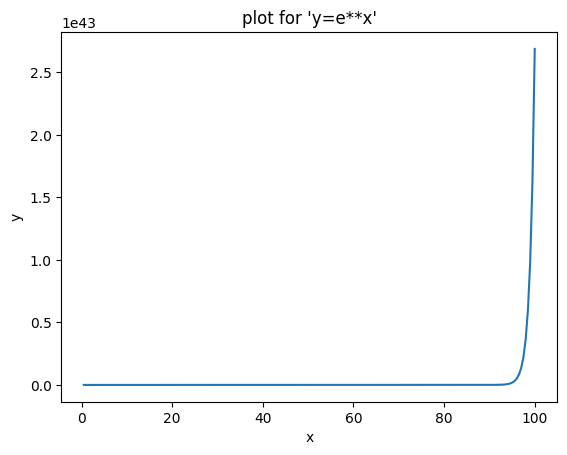

In [59]:
y=np.exp(x)
plt.plot(x,y)
plt.title("plot for 'y=e**x'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Question 10:
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [60]:
mat=np.random.uniform(1,2,size=(20,5))
mat=np.transpose(mat)

lab=["a","b","c","d","e"]

dic={}
for i in range(5):
  dic[lab[i]]=mat[i]

data=pd.DataFrame(dic,columns=lab)

stdlist=[]
for i in range(len(lab)):
  dumpl=np.array(data[lab[i]])
  stdlist.append(np.std(dumpl))

max=stdlist[0]
maxi=0
for i in range(0,len(stdlist)):
  if (max<stdlist[i]):
    max=stdlist[i]
    maxi=i

meanlist=[]
for i in range(20):
  dumpl=np.array(data.iloc[i])
  meanlist.append(np.mean(dumpl))

min=meanlist[0]
mini=0
for i in range(20):
  if (min>meanlist[i]):
    min=meanlist[i]
    mini=i

print("Column '",lab[maxi],"' has highest deviation.")
print("Row ",list(data.iloc[mini]),"has lowest deviation.")

Column ' d ' has highest deviation.
Row  [1.3861856165670705, 1.2338083901557386, 1.347556723600774, 1.6931240016457756, 1.307830220566188] has lowest deviation.


Question11:
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [61]:
data["f"]=data.sum(axis=1)

g=[]
dump=list(data["f"])
for i in range(len(dump)):
  if (dump[i]>8):
    g.append("GT8")
  else:
    g.append("LT8")

data["g"]=pd.Series(np.array(g))

len1=len(data[data["g"]=="LT8"])

data1=data[data["g"]=="LT8"]
data2=data[data["g"]=="GT8"]

std1=data1["f"].std(axis=0)
std2=data2["f"].std(axis=0)

print("The number of rows in the dataframe where the value in the column 'g' is 'LT8':",len1)
print("The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8':",std1)
print("The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8':",std2)

The number of rows in the dataframe where the value in the column 'g' is 'LT8': 15
The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8': 0.3528483186141621
The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8': 0.34796761069958493


Question13:
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [62]:
def argmin(l):
  min=l[0]
  mini=0
  for i in range(len(l)):
    if (min>l[i]):
      min=l[i]
      mini=i
  return mini

l=np.random.randint(1,10,size=10)
minind1=argmin(l)
minind2=np.argmin(l)
print("Index of the minimum element using function:",minind1)
print("Index of the minimum element using np.argmin:",minind2)

Index of the minimum element using function: 1
Index of the minimum element using np.argmin: 1


References:
[1]https://www.geeksforgeeks.org/python-time-time-method/
[2]https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.gradient.html
[3]https://jax.readthedocs.io/en/latest/installation.html
[4]https://youtu.be/5uuNsG3J_s4?si=anLtABaw8E4XgSaW
[5]https://youtu.be/mGID0ClW54o?si=X-pSDuSrWZ9OJ_m8